In [1]:
import numpy as np
import random
import os
import mpmath as mp
import math
import seaborn as sns 

In [2]:
def Kmeans(x, μ, K):
	n_tot, d = x.shape
	err = []
	N = np.zeros(K)
	distribution = np.zeros([n_tot, K])
	for n in range(n_tot):
		for k in range(K):
				err.append(np.linalg.norm(μ[k]-x[n]))
		err = np.array(err)
		i = np.argmin(err)
		N[i] += 1
		distribution[n, i] = 1
		err = []

	μ_new = np.zeros([K, d])
	for k in range(K):
		for n in range(n_tot):
			μ_new[k, :] += x[n]*distribution[n, k]
		μ_new[k, :] /= N[k]

	Σ_new = np.zeros([K, d, d])
	distortion = 0
	for k in range(K):
		for n in range(n_tot):
			Σ_new[k, :, :] += distribution[n, k]*((x[n]-μ_new[k]).reshape(d,1)@(x[n]-μ_new[k]).reshape(1,d))
			distortion += distribution[n, k]*np.linalg.norm(μ_new[k]-x[n])
		Σ_new[k, :, :] /= N[k]
	for k in range(K):
		Σ_new[k, :, :] = np.eye(d)*Σ_new[k, :, :]
	return (N, μ_new, Σ_new, distortion)

In [3]:

def gaussian(x, μ, Σ):
	d = len(μ)
	exponent = mp.exp(-0.5*(x-μ)@np.linalg.inv(Σ)@(x-μ).T)
	det = 1/(np.linalg.det(Σ))**0.5
	gdf = (1/(((2*np.pi)**(d/2))*det))*exponent
	return gdf

def GMM(x, π, μ, Σ, K):
	n_tot, d = x.shape
	γ = np.zeros((n_tot, K))
	for n in range(n_tot):
		Sum = 0
		for k in range(K):
			Sum += (π[k])*gaussian(x[n], μ[k], Σ[k])
		for k in range(K):
			γ[n, k] = ((π[k])*gaussian(x[n], μ[k], Σ[k]))/Sum

	N = np.zeros(K)
	π_new = np.zeros(K)
	for k in range(K):
		for n in range(n_tot):
			N[k] += γ[n, k]
		π_new[k] = N[k]/n_tot
	# print(N)
	μ_new = np.zeros((K, d))
	for k in range(K):
		for n in range(n_tot):
			μ_new[k, :] += γ[n, k]*x[n]
		μ_new[k, :] /= N[k]

	Σ_new = np.zeros([K, d, d])
	distortion = 0
	for k in range(K):
		for n in range(n_tot):
			Σ_new[k, :, :] += γ[n, k] * (x[n]-μ_new[k]).reshape(d,1)@(x[n]-μ_new[k]).reshape(1,d)
			distortion += γ[n, k]*np.linalg.norm(μ_new[k]-x[n])
		Σ_new[k, :, :] /= N[k]
	for k in range(K):
		Σ_new[k, :, :] = np.eye(d)*Σ_new[k, :, :]

	return (π_new, μ_new, Σ_new, distortion)

In [5]:
def read_data(dataset, type):
	curr = os.getcwd()
	path = f"../../Assets/K-Means/Image Dataset/{dataset}/{type}"
	os.chdir(path)

	dataList = []
	files = [file for file in os.listdir()]

	for file in files:
		dataList.append(np.genfromtxt(file, delimiter=' ', dtype=float))
	os.chdir(curr)
	return np.array(dataList)

In [6]:
train_coast = read_data('coast', 'train')
dev_coast = read_data('coast', 'dev')
train_forest = read_data('forest', 'train')
dev_forest = read_data('forest', 'dev')
train_highway = read_data('highway', 'train')
dev_highway = read_data('highway', 'dev')
train_mountain = read_data('mountain', 'train')
dev_mountain = read_data('mountain', 'dev')
train_opencountry = read_data('opencountry', 'train')
dev_opencountry = read_data('opencountry', 'dev')

In [337]:
C = []

C1 = train_coast.flatten().reshape(-1, 23)
C.append((C1 - C1.min(axis = 0))/(C1.max(axis = 0)-C1.min(axis = 0)))
C2 = train_forest.flatten().reshape(-1, 23)
C.append((C2 - C2.min(axis = 0))/(C2.max(axis = 0)-C2.min(axis = 0)))
C3 = train_highway.flatten().reshape(-1, 23)
C.append((C3 - C3.min(axis = 0))/(C3.max(axis = 0)-C3.min(axis = 0)))
C4 = train_mountain.flatten().reshape(-1, 23)
C.append((C4 - C4.min(axis = 0))/(C4.max(axis = 0)-C4.min(axis = 0)))
C5 = train_opencountry.flatten().reshape(-1, 23)
C.append((C5 - C5.min(axis = 0))/(C5.max(axis = 0)-C5.min(axis = 0)))

In [338]:
D = []

D1 = dev_coast.flatten().reshape(-1, 23)
D.append((D1 - D1.min(axis = 0))/(D1.max(axis = 0)-D1.min(axis = 0)))
D2 = dev_forest.flatten().reshape(-1, 23)
D.append((D2 - D2.min(axis = 0))/(D2.max(axis = 0)-D2.min(axis = 0)))
D3 = dev_highway.flatten().reshape(-1, 23)
D.append((D3 - D3.min(axis = 0))/(D3.max(axis = 0)-D3.min(axis = 0)))
D4 = dev_mountain.flatten().reshape(-1, 23)
D.append((D4 - D4.min(axis = 0))/(D4.max(axis = 0)-D4.min(axis = 0)))
D5 = dev_opencountry.flatten().reshape(-1, 23)
D.append((D5 - D5.min(axis = 0))/(D5.max(axis = 0)-D5.min(axis = 0)))

In [339]:
def stats(x):
	μ = x.mean(0)
	Σ = np.cov(x, rowvar=False)
	return (μ, Σ)

def initial(x, K):
	n, d = x.shape
	μ_initial = np.zeros([K, d])
	Σ_initial = np.zeros([K, d, d])
	for k in range(K):
		index = random.randint(0, n)
		μ_initial[k,:] = x[index]
		Σ_initial[k,:,:] = stats(x)[1]
	return (μ_initial, Σ_initial)

In [340]:
## K Keans implementation
K = 6
μ = []
Σ = []
N = []
dk = []

for c in range(5):
	μ_initial, Σ_initial = initial(C[c], K)
	μ.append(μ_initial)
	Σ.append(Σ_initial)

μ = np.array(μ)
Σ = np.array(Σ)

for c in range(5):
	N_c, μ[c], Σ[c], dk_c = Kmeans(C[c], μ[c], K)
	N.append(N_c)
	dk.append(dk_c)

N = np.array(N)
dk = np.array(dk)

for c in range(5):
	for j in np.arange(1, 20):
		N[c], μ[c], Σ[c], dk[c] = Kmeans(C[c], μ[c], K)
  

In [341]:
##GMM implementation
π = []
dg = []
for c in range(5):
	π.append(np.zeros(K))

π = np.array(π)

for c in range(5):
	for k in range(K):	
		π[c][k] = N[c][k]/len(C[c])

for c in range(5):
	π[c], μ[c], Σ[c], dg_c = GMM(C[c], π[c], μ[c], Σ[c], K)
	dg.append(dg_c)

dg = np.array(dg)

for c in range(5):
	for j in range(1, 3):
		π[c], μ[c], Σ[c], dg[c] = GMM(C[c], π[c], μ[c], Σ[c], K)

In [342]:
## Confusion Matrix

prediction = []
score = []

for j in range(5):
	prediction_d = np.zeros(D[j].shape[0])
	score_d = np.zeros(D[j].shape[0])
	for i in range(D[j].shape[0]):
		pt = D[j][i]
		P = np.zeros(5)
		for c in range(5):
			for k in range(K):
				P[c] += mp.log(π[c,k]*gaussian(pt, μ[c,k], Σ[c,k]))
		prediction_d[i] = np.argmax(P)
		score_d[i] = P.max()
	prediction.append(prediction_d)
	score.append(score_d)
	

C:\Users\aksha\AppData\Local\Temp\ipykernel_13828\3808092076.py:4: RuntimeWarning: invalid value encountered in double_scalars
  det = 1/(np.linalg.det(Σ))**0.5
C:\Users\aksha\AppData\Local\Temp\ipykernel_13828\3808092076.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  det = 1/(np.linalg.det(Σ))**0.5


In [343]:
final = []
for c in range(5):
	count = 0
	final_d = np.zeros(int(D[c].shape[0]/36))
	for i in range(int(D[c].shape[0]/36)):
		class_count = np.zeros(5)
		for j in range(36):
			class_count[int(prediction[c][count])] += 1; 
			count += 1
		final_d[i] = np.argmax(class_count)
	final.append(final_d)


In [344]:
CMatrix = np.zeros((5,5))
for c in range(5):
	for i in range(int(D[c].shape[0]/36)):
		CMatrix[int(final[c][i]), c] +=  1

print(CMatrix)

[[ 0.  0.  0.  0.  0.]
 [73. 66. 52. 75. 82.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


<AxesSubplot:>

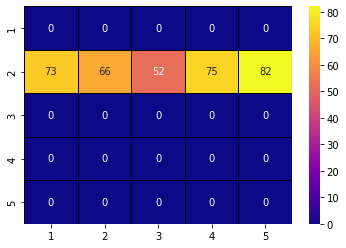

In [345]:
sns.heatmap(CMatrix, annot = True, cmap ='plasma',linecolor ='black', linewidths = 1, fmt = '.0f', xticklabels = '12345', yticklabels = '12345')